## Mount Google Drive and Load Dataset




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data = pd.read_csv('/content/drive/MyDrive/Unified Mentor Projects/netflix1.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Basic Dataset Overview

In [43]:
print(f'\nDataframe Shape: {data.shape}')
print(f'\nColumn Names: {data.columns}')



Dataframe Shape: (8790, 10)

Column Names: Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


## Handling Missing Data & Duplicates

In [45]:
print(f'\nMissing Values: \n{data.isnull().sum()}')
print('-' * 17)
print(f'\nDuplicate Rows: {data.duplicated(keep=False).sum()}')


Missing Values: 
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
-----------------

Duplicate Rows: 0


## Data Preprocessing

In [59]:
data['date_added'] = pd.to_datetime(data['date_added'])

data['release_year'] = pd.to_datetime(data['release_year'], format='%Y').dt.year


## Feature Engineering

In [63]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [140]:
data['genre_count'] = data['listed_in'].apply(lambda x: len(x.split(', ')))

data[['title','listed_in','genre_count']]

,title,listed_in,genre_count
0,Dick Johnson Is Dead,Documentaries,1
1,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",3
2,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",3
3,Confessions of an Invisible Girl,"Children & Family Movies, Comedies",2
4,Sankofa,"Dramas, Independent Movies, International Movies",3
...,...,...,...
8785,Yunus Emre,"International TV Shows, TV Dramas",2
8786,Zak Storm,Kids' TV,1
8787,Zindagi Gulzar Hai,"International TV Shows, Romantic TV Shows, TV ...",3
8788,Yoko,Kids' TV,1


In [150]:
def extract_duration(row):
    if 'min' in row['duration']:
        return int(row['duration'].split()[0])
    return None

def extract_seasons(row):
    if 'Season' in row['duration']:
        return int(row['duration'].split()[0])
    return None


data['duration_minutes'] = data.apply(extract_duration, axis=1)
data['num_seasons'] = data.apply(extract_seasons, axis=1)



In [153]:
data['duration_minutes'] = data['duration_minutes'].fillna(0)
data['num_seasons'] = data['num_seasons'].fillna(0)

In [155]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,genre_count,duration_minutes,num_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],1,90.0,0.0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac...",3,0.0,1.0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",3,0.0,1.0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2,91.0,0.0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International Mov...",3,125.0,0.0


### Visualization 1: Content Type Distribution

Bar plot showing count of Movies vs. TV Shows.

<ipython-input-69-b3a3385bd6ff>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


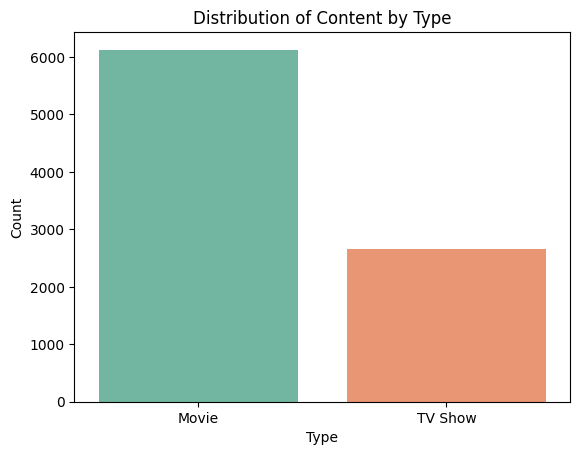

In [69]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Netflix hosts a larger volume of Movies (6,000) compared to TV Shows (2,500). This indicates a clear preference or production focus on movies over series.

### Visualization 2: Top 10 Content Release Years

Bar plot of most active years for content releases.

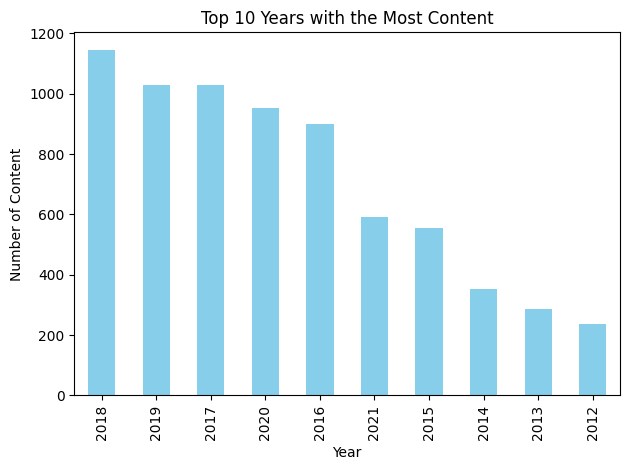

In [75]:
top_years = data['release_year'].value_counts().sort_values(ascending=False).head(10)

top_years.plot(kind='bar', color='skyblue', title='Top 10 Years with the Most Content')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.tight_layout()
plt.show()

The year 2018 saw the highest content releases, showing a significant peak in Netflix’s production or acquisition activity. Most of the content spans between 2016–2020, highlighting rapid growth during those years.

### Visualization 3: Top 10 Countries by Content

Bar chart and pie chart for country-wise distribution.

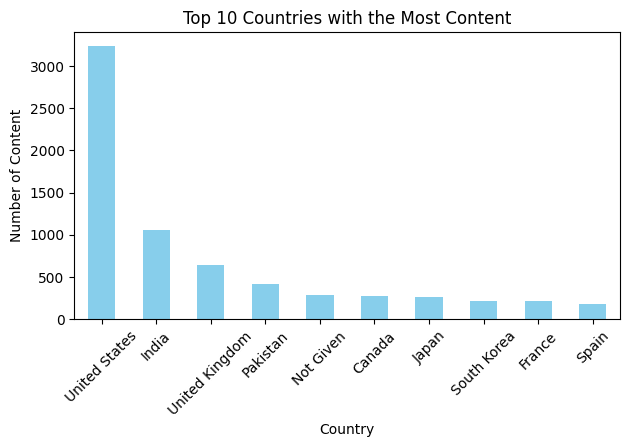

In [96]:
top_countries = data['country'].value_counts().sort_values(ascending=False).head(10)

top_countries.plot(kind='bar', color='skyblue', title='Top 10 Countries with the Most Content')
plt.xlabel('Country')
plt.ylabel('Number of Content')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

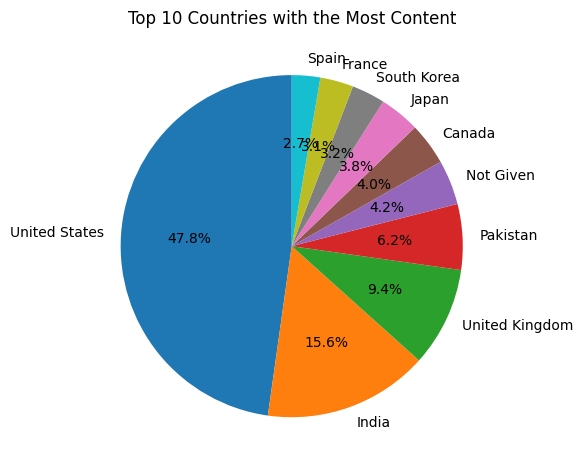

In [123]:
top_countries = data['country'].value_counts().sort_values(ascending=False).head(10)

top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                   title='Top 10 Countries with the Most Content')
plt.ylabel('')
plt.tight_layout()
plt.show()

The United States dominates the content library with a substantial margin. In the pie chart, the US alone accounts for 47.8% of all titles, emphasizing Netflix’s American origin and market focus.

### Visualization 4: Most Common Genres

Bar chart and pie chart for top genres on Netflix.

<ipython-input-104-1157ba28ec25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')


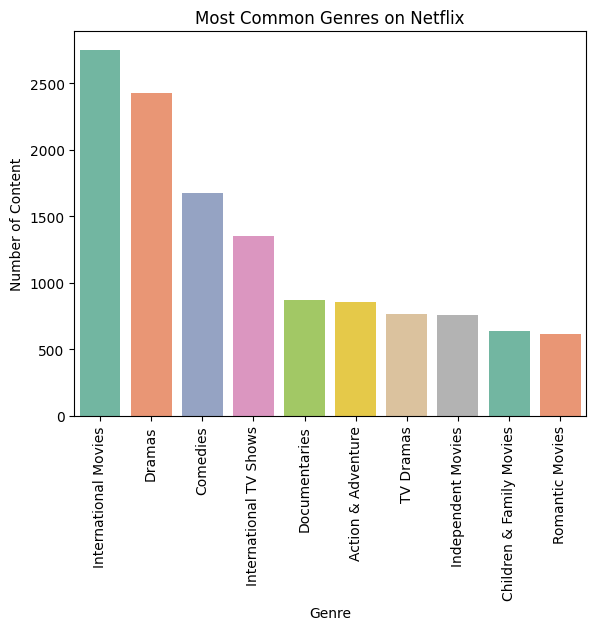

In [104]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'],[])
genre_counts = pd.Series(all_genres).value_counts().head(10)

sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Content')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

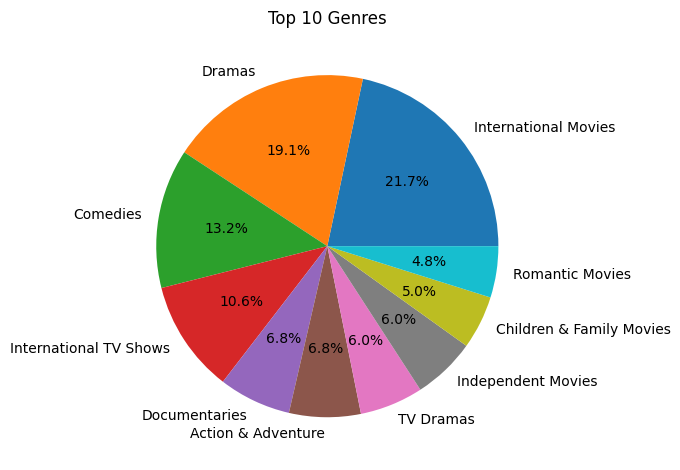

In [126]:
all_genres = sum(data['genres'],[])
genre_counts = pd.Series(all_genres).value_counts().head(10)

# plt.figure(figsize=(10, 6))

genre_counts.plot(kind='pie', autopct='%1.1f%%', title = 'Top 10 Genres')
plt.ylabel('')
plt.tight_layout()
plt.show()

The most prominent genres are International Movies (21.7%) and Dramas (19.1%), indicating Netflix's global expansion and focus on deep storytelling content.

### Visualization 5: Top 10 Directors

Bar chart showing directors with the most titles.

<ipython-input-118-77423d963293>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set2')


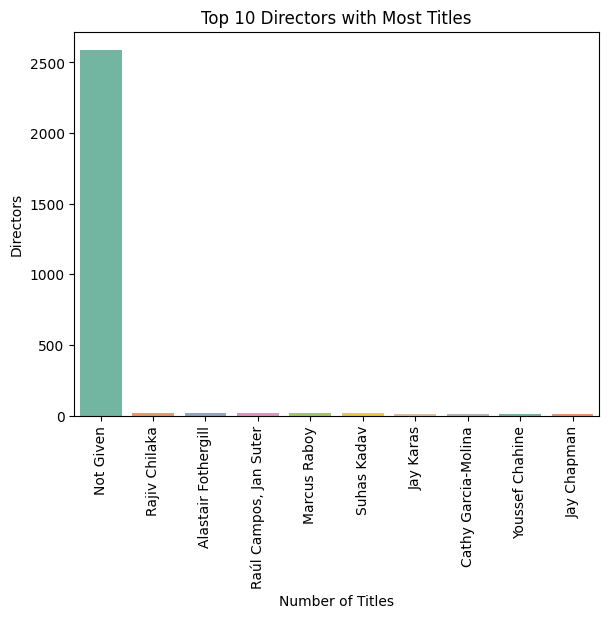

In [118]:
top_directors = data['director'].value_counts().sort_values(ascending=False).head(10)

sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set2')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Over 2,500 titles lack director information. Among the known directors, Rajiv Chilaka ranks high—highlighting contributions from Indian animation and children's content.

### Word Cloud: Movie Titles

WordCloud visualization of all movie titles.

In [131]:
titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(titles))

word_counts = wordcloud.process_text(' '.join(titles))

top_10 = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

for word, count in top_10:
    print(f"{word}: {count}")


Love: 106
Movie: 73
Christmas: 72
Man: 65
Story: 63
Day: 56
Life: 53
World: 52
Girl: 50
Live: 48


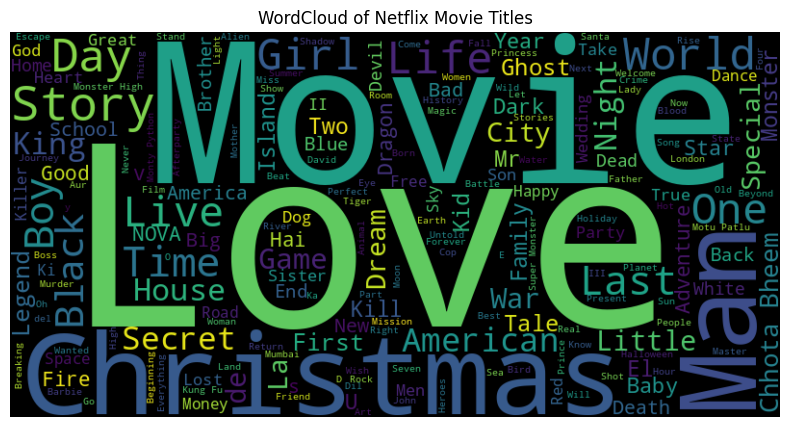

In [82]:
titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(titles))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Netflix Movie Titles')
plt.show()

Words like "girl", "movie", and "Christmas" appear frequently in titles, suggesting a mix of romance, drama, and seasonal films in Netflix’s catalog.